<font size =6> importing libraries </font>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

<font size = 4> Reading the file as data frame </font>

In [6]:
df = pd.read_csv("Bank-marketing campaign.csv")

In [7]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,outcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


<font size = 3> Exploratory Data Analysis </font>

In [9]:
# to check if there are any null values
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
outcome      0
deposit      0
dtype: int64

Form the above output it is clear that there are not any null values

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  outcome    45211 non-null  object
 16  deposit    45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [12]:
df['deposit'].value_counts()
#to check how many have agreed to deposit after the phone call

no     39922
yes     5289
Name: deposit, dtype: int64

In [13]:
# The unique function is used to display the unique job titles in the array.
df.job.unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [14]:
#df.shape helps to check the shape data frames and series.
df.shape

(45211, 17)

In [15]:
# Tail function will tell you the last 5 records of the dataset.
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,outcome,deposit
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


Text(0.5, 1.0, 'Correlation Factors Heat Map')

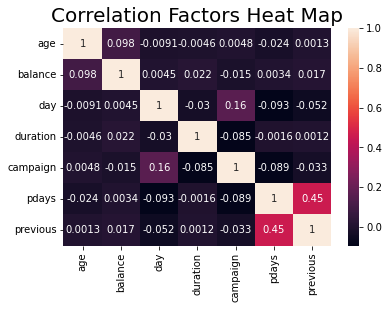

In [16]:
#to see the correaltion between the various variables
sns.heatmap(df.corr(), annot=True).set_title('Correlation Factors Heat Map', color='black', size='20')

It is clear from the above heat map that there is a correlation between age and balance ; day and campaign ; pdays and previous 

In [17]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [20]:
df.campaign.unique()

array([ 1,  2,  3,  5,  4,  6,  7,  8,  9, 10, 11, 12, 13, 19, 14, 24, 16,
       32, 18, 22, 15, 17, 25, 21, 43, 51, 63, 41, 26, 28, 55, 50, 38, 23,
       20, 29, 31, 37, 30, 46, 27, 58, 33, 35, 34, 36, 39, 44],
      dtype=int64)

In [31]:
df['age_group'] = pd.cut(df['age'], bins=[18, 28,39,50,60,100],labels=['18-28','29-39','40-50','51-60','61-100'])

In [32]:
df['age_group']

0         51-60
1         40-50
2         29-39
3         40-50
4         29-39
          ...  
45206     51-60
45207    61-100
45208    61-100
45209     51-60
45210     29-39
Name: age_group, Length: 45211, dtype: category
Categories (5, object): ['18-28' < '29-39' < '40-50' < '51-60' < '61-100']

In [28]:
df.age.max()

95

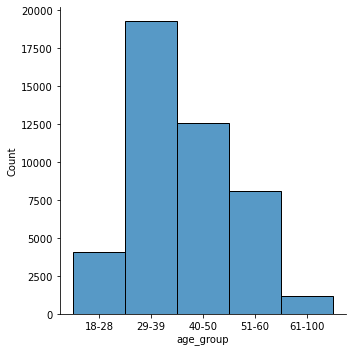

In [35]:
sns.displot(df['age_group'])

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='deposit', ylabel='count'>

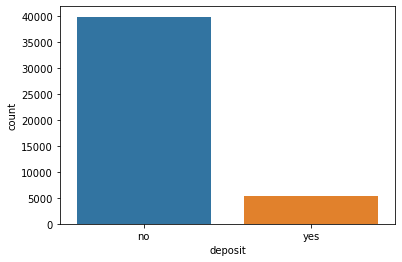

In [36]:
sns.countplot(df['deposit'])

In [41]:
df_age = df[['age_group','deposit']]

In [42]:
df_age.groupby('age_group')

In [43]:
df_age.head()

,age_group,deposit
0,51-60,no
1,40-50,no
2,29-39,no
3,40-50,no
4,29-39,no


<AxesSubplot:xlabel='deposit'>

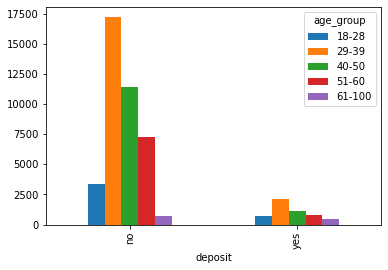

In [44]:
df.groupby(['deposit', 'age_group']).size().unstack().plot.bar()

From the above plot we can conclude that age group 29-39 has maximum yes count and they also have maximum no count

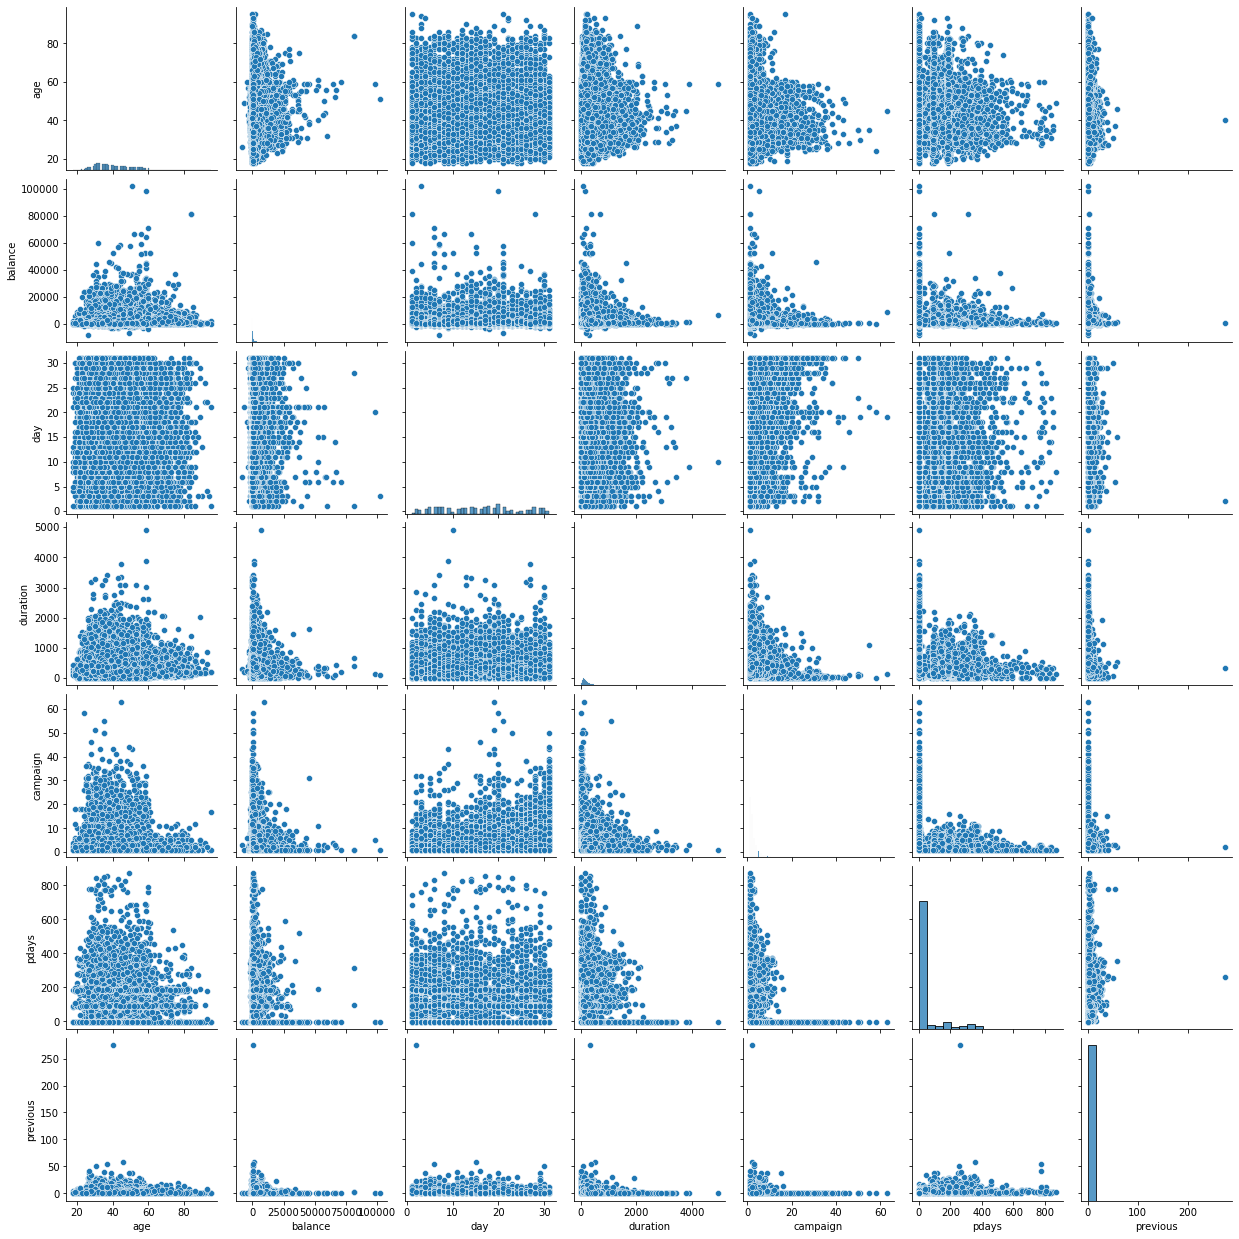

In [45]:
sns.pairplot(df)

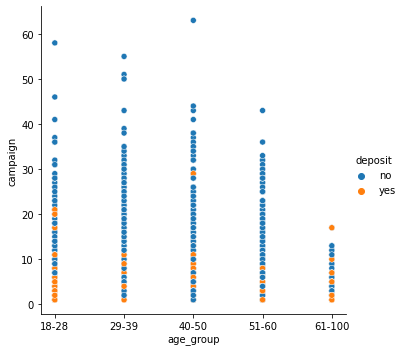

In [47]:
sns.relplot(x='age_group',y='campaign',hue='deposit',data=df)

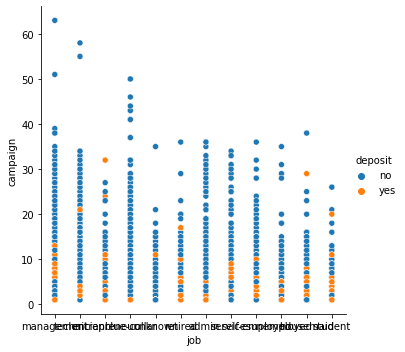

In [48]:
sns.relplot(x='job',y='campaign',hue='deposit',data=df)

<AxesSubplot:xlabel='deposit'>

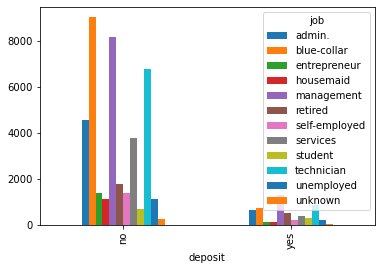

In [49]:
df.groupby(['deposit', 'job']).size().unstack().plot.bar()

In [52]:
df['age_group'].dtype

CategoricalDtype(categories=['18-28', '29-39', '40-50', '51-60', '61-100'], ordered=True)

<AxesSubplot:title={'center':'Job and deposit'}>

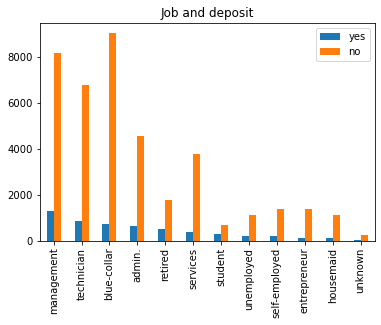

In [53]:
#job and deposit
x_df = pd.DataFrame()

x_df['yes'] = df[df['deposit'] == 'yes']['job'].value_counts()
x_df['no'] = df[df['deposit'] == 'no']['job'].value_counts()

x_df.plot.bar(title = 'Job and deposit')

<AxesSubplot:title={'center':'Marital status and deposit'}>

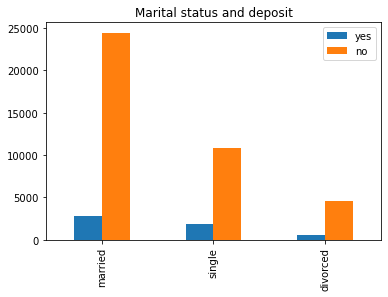

In [54]:
#marital status and deposit
x_df = pd.DataFrame()

x_df['yes'] = df[df['deposit'] == 'yes']['marital'].value_counts()
x_df['no'] = df[df['deposit'] == 'no']['marital'].value_counts()

x_df.plot.bar(title = 'Marital status and deposit')